In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2
import numpy as np
import os
import pandas as pd

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
! mkdir image

In [4]:
ls

image/                 TEST_BIODEG_HFL_2.jpg  TEST_BIODEG_HFL_6.jpg
sample_data/           TEST_BIODEG_HFL_3.jpg  TEST_BIODEG_HFL_7.jpg
TEST_BIODEG_HFL_0.jpg  TEST_BIODEG_HFL_4.jpg  TEST_BIODEG_HFL_8.jpg
TEST_BIODEG_HFL_1.jpg  TEST_BIODEG_HFL_5.jpg  TEST_BIODEG_HFL_9.jpg


In [6]:
! mv TRAIN.1/ image/

In [7]:
! mv TEST/ image/

In [8]:
file_path="/content/image"

In [10]:
# example of progressively loading images from file
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip=True,
                             rotation_range=30)
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('/content/image/TRAIN.1', 
                                       class_mode='categorical',
                                       target_size=(224, 224),
                                       batch_size=2,
                                       seed=7)

test_it = datagen.flow_from_directory('/content/image/TEST',  
                                       class_mode='categorical',
                                       target_size=(224, 224),
                                       batch_size=2,
                                       seed=7)

Found 60 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential

In [12]:
model = Sequential()
model.add(Conv2D(32, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [13]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [19]:
model.save("model.h5")

In [20]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [21]:
for layer in vgg.layers:
  layer.trainable = False

In [22]:
output_classes = 2

In [23]:
##Adding flatten and Dense Layer
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)

prediction = Dense(output_classes, activation='softmax')(x)

In [24]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [25]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [26]:
# tell the model what cost and optimization method to use
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(
  loss=CategoricalCrossentropy(),
  optimizer='adam',
  metrics=['accuracy']
)

In [28]:
model.save("bio.h5")

In [29]:
from keras.models import load_model
 
# load model
model = load_model('bio.h5')

In [39]:
import tkinter

In [ ]:
from keras.preprocessing.image import load_img
image = load_img('/content/tomato.jfif', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)

In [ ]:
l={"Biodegradable":label[0][0],"NON-Biodegradable":label[0][1]}
def get_key(val):
    for key, value in l.items():
         if val == value:
             return key
 
    return "key doesn't exist"
#label[0][1]

In [ ]:
check=label.max()
get_key(check)

In [45]:
!pip install ipyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.9 MB/s eta 0:00:00


In [46]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import ipyplot


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        


In [47]:
input_img = imageio.imread('/content/TEST_BIODEG_HFL_0.jpg')

In [48]:
#Horizontal Flip
hflip= iaa.Fliplr(p=1.0)
input_hf= hflip.augment_image(input_img)


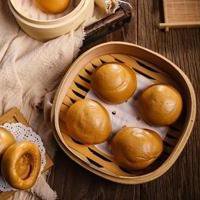
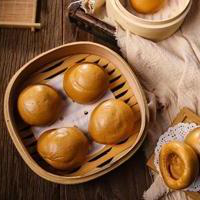
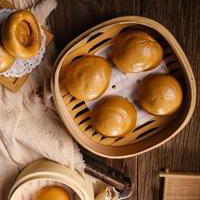


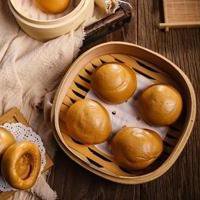
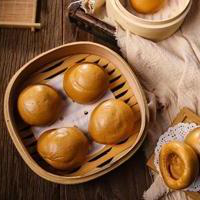
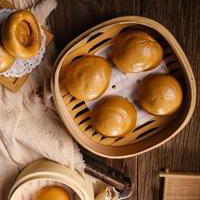

In [49]:
#Vertical Flip
vflip= iaa.Flipud(p=1.0) 
input_vf= vflip.augment_image(input_img)
images_list=[input_img, input_hf, input_vf]
labels = ['Original', 'Horizontally flipped', 'Vertically flipped']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


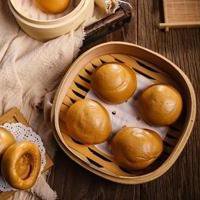
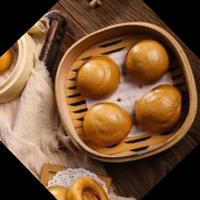


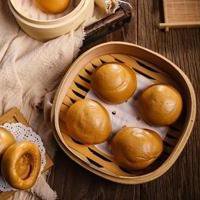
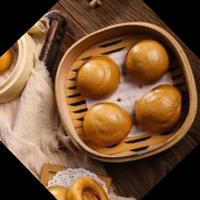

In [50]:
#Image Rotation
rot1 = iaa.Affine(rotate=(-50,20))
input_rot1 = rot1.augment_image(input_img)
images_list=[input_img, input_rot1]
labels = ['Original', 'Rotated Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


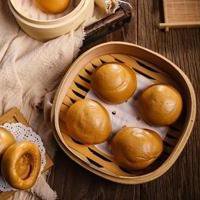
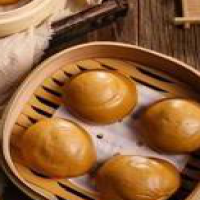


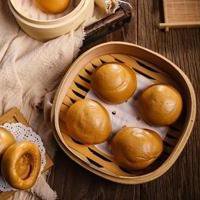
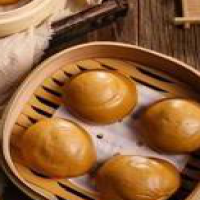

In [51]:
#Image Cropping
crop1 = iaa.Crop(percent=(0, 0.3)) 
input_crop1 = crop1.augment_image(input_img)
images_list=[input_img, input_crop1]
labels = ['Original', 'Cropped Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


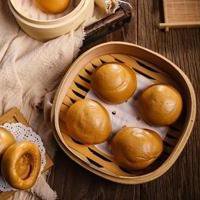
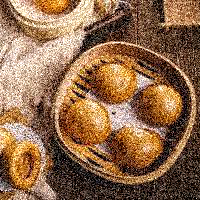


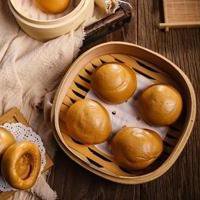
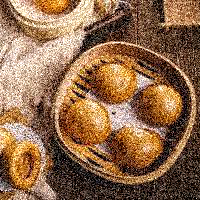

In [52]:
#Adding Noise to Images
noise=iaa.AdditiveGaussianNoise(10,40)
input_noise=noise.augment_image(input_img)
images_list=[input_img, input_noise]
labels = ['Original', 'Gaussian Noise Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


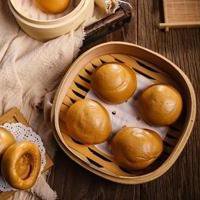
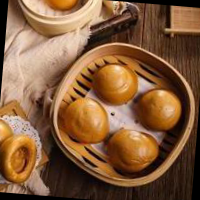


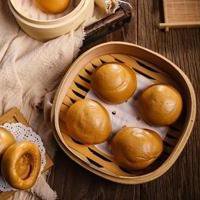
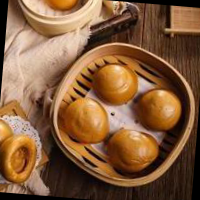

In [53]:
#Image Shearing
shear = iaa.Affine(shear=(-40,40))
input_shear=shear.augment_image(input_img)
images_list=[input_img, input_shear]
labels = ['Original', 'Image Shearing']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


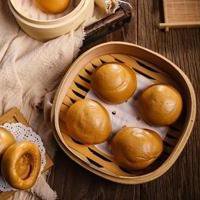
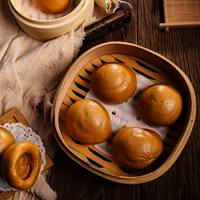
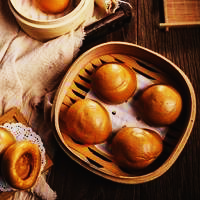
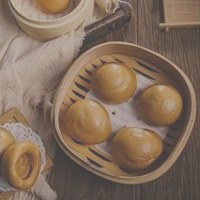


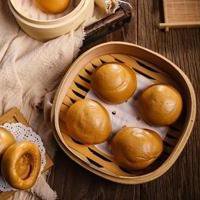
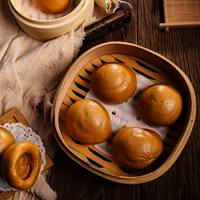
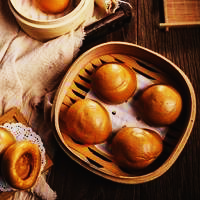
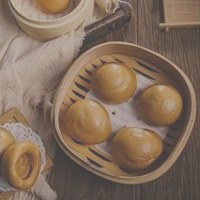

In [54]:
#Image Contrast
contrast=iaa.GammaContrast((0.5, 2.0))
contrast_sig = iaa.SigmoidContrast(gain=(5, 10), cutoff=(0.4, 0.6))
contrast_lin = iaa.LinearContrast((0.6, 0.4))
input_contrast = contrast.augment_image(input_img)
sigmoid_contrast = contrast_sig.augment_image(input_img)
linear_contrast = contrast_lin.augment_image(input_img)
images_list=[input_img, input_contrast,sigmoid_contrast,linear_contrast]
labels = ['Original', 'Gamma Contrast','SigmoidContrast','LinearContrast']
ipyplot.plot_images(images_list,labels=labels,img_width=180)